# Continuous-time Approximation of Digital Sampling Systems

Numerical simulation on systems with digital input, and their surrogate time-varying delay systems.

Mechanical systems with control input obtained from digital signals often have the following dynamics:

$$
\begin{equation*}
    M (\vec{q}) \ddot{\vec{q}} + C (\vec{q}, \dot{\vec{q}}) \vec{q} + G (\vec{q}) + f (\dot{\vec{q}}) = \tau \left( \dot{\vec{q}} \left( (k-1) t_{s} \right), \vec{q} \left( (k-1) t_{s} \right) \right).
\end{equation*}
$$

when $t \in [k t_{s}, (k+1) t_{s})$.

The equation can be handled as a DDE

$$
\begin{equation*}
    M (\vec{q}) \ddot{\vec{q}} + C (\vec{q}, \dot{\vec{q}}) \vec{q} + G (\vec{q}) + f (\dot{\vec{q}}) = \tau \left( \dot{\vec{q}} \left( t - t_{d} \right), \vec{q} \left( t - t_{d} \right) \right).
\end{equation*}
$$

, where the delay $t_{d}$ is a sawtooth wave function of time $t$:

$$
\begin{equation*}
    t_{d} = t - t_{s} \left( \left \lfloor \frac{t}{t_{s}} \right \rfloor - 1 \right).
\end{equation*}
$$

The sawtooth-wave delay $t_{d}$ can be written in Fourier series form:

$$
\begin{equation*}
    t_{d} (t, t_{s}) = t_{s} \left( \frac{3}{2} - \frac{1}{\pi} \sum_{n = 1}^{\infty} \frac{1}{n} \sin{\left( \frac{2 n \pi t}{t_{s}} \right)} \right),
\end{equation*}
$$

which is demonstrated below.


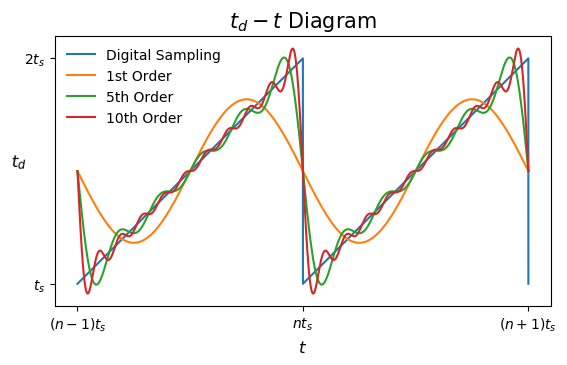

In [1]:
from utils import *
import numpy as np
import matplotlib.pyplot as plt

ts = 0.5
t = np.linspace(3 * ts, 5 * ts, 20001)

fig, ax = plt.subplots()
ax.plot(t, SawtoothExact(t, ts), label="Digital Sampling")
ax.plot(t, SawtoothApprox(t, ts, 1), label="1st Order")
ax.plot(t, SawtoothApprox(t, ts, 5), label="5th Order")
ax.plot(t, SawtoothApprox(t, ts, 10), label="10th Order")
ax.set_xlim([2.9 * ts, 5.1 * ts])
ax.set_ylim([0.9 * ts, 2.1 * ts])
ax.set_xticks([3 * ts, 4 * ts, 5 * ts])
ax.set_yticks([ts, 2 * ts])
ax.set_xticklabels([r"$(n-1)t_{s}$", r"$n t_{s}$", r"$(n+1) t_{s}$"])
ax.set_yticklabels([r"$t_{s}$", r"$2 t_{s}$"])
ax.set_xlabel(r"$t$", fontsize=12)
ax.set_ylabel(r"$t_{d}$", fontsize=12, rotation=np.pi / 2)
ax.set_title(r"$t_{d}-t$ Diagram", fontsize=15)
ax.legend(frameon=False)
ax.set_aspect(1)
plt.show()

Error at sampling moments is inevitable, as is shown below.

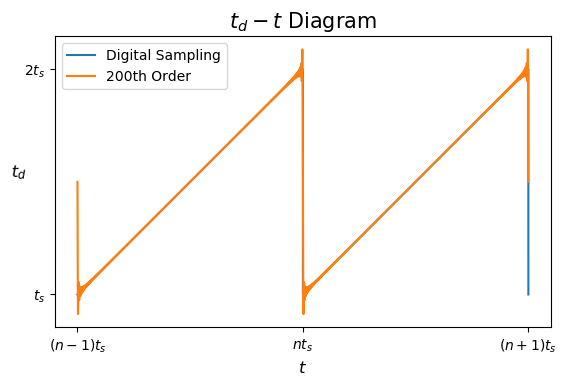

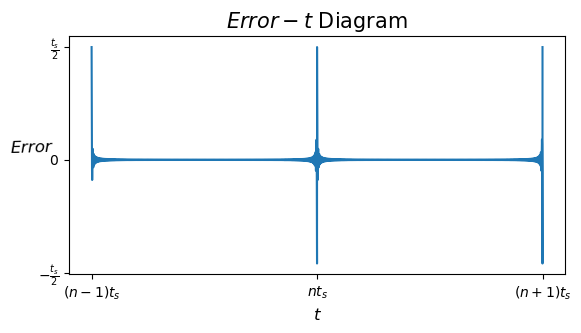

In [4]:
plt.plot(t, SawtoothExact(t, ts), label="Digital Sampling")
plt.plot(t, SawtoothApprox(t, ts, 200), label="200th Order")
plt.gca().set_xticks([3 * ts, 4 * ts, 5 * ts])
plt.gca().set_yticks([ts, 2 * ts])
plt.gca().set_xticklabels([r"$(n-1)t_{s}$", r"$n t_{s}$", r"$(n+1) t_{s}$"])
plt.gca().set_yticklabels([r"$t_{s}$", r"$2 t_{s}$"])
plt.gca().set_aspect(1)
plt.xlabel(r"$t$", fontsize=12)
plt.ylabel(r"$t_{d}$", fontsize=12, rotation=np.pi / 2)
plt.title(r"$t_{d}-t$ Diagram", fontsize=15)
plt.legend()
plt.show()

plt.plot(t, SawtoothApprox(t, ts, 200) - SawtoothExact(t, ts))
plt.gca().set_xticks([3 * ts, 4 * ts, 5 * ts])
plt.gca().set_yticks([-0.5 * ts, 0, 0.5 * ts])
plt.gca().set_xticklabels([r"$(n-1)t_{s}$", r"$n t_{s}$", r"$(n+1) t_{s}$"])
plt.gca().set_yticklabels([r"$-\frac{t_{s}}{2}$", r"$0$", r"$\frac{t_{s}}{2}$"])
plt.gca().set_aspect(1)
plt.xlabel(r"$t$", fontsize=12)
plt.ylabel(r"$Error$", fontsize=12, rotation=np.pi / 2)
plt.title(r"$Error-t$ Diagram", fontsize=15)
plt.show()